In [44]:
#Original equation: 322x - 369
#R^2 = 1 (exact)

import pandas as pd
import numpy as np

calc = pd.DataFrame(np.zeros([16,14],dtype=float),columns=['a0','a1','a2','x','Actual y','Predicted y','Diff','sum_Diff','v0', \
                                                          'v1','v2','sum_v0','sum_v1','sum_v2'])

In [45]:
#DF for calculating the gradient vector and cost function (difference in y)

#Initialize values
calc['x'] = [-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10]
calc['Actual y'] = [-1979,-1657,-1335,-1013,-691,-369,-47,275,597,919,1241,1563,1885,2207,2529,2851]
calc['a0'] = 0
calc['a1'] = 0
calc['a2'] = 0.5

#Number of samples m
m = 16

for i in range(0,m):
    #Calculate predicted y, difference of y, gradient of a0, a1, a2 (v0, v1, v2)
    calc['Predicted y'][i] = calc['a0'][i] + calc['a1'][i]*calc['x'][i] + calc['a2'][i]*calc['x'][i]**2
    calc['Diff'][i] = 1/(2*m) * (calc['Predicted y'][i] - calc['Actual y'][i])**2
    calc['v0'][i] = 1/m * (calc['Predicted y'][i] - calc['Actual y'][i])
    calc['v1'][i] = 1/m * (calc['Predicted y'][i] - calc['Actual y'][i]) * calc['x'][i]
    calc['v2'][i] = 1/m * (calc['Predicted y'][i] - calc['Actual y'][i]) * calc['x'][i]**2
    #Save values of gradient and difference in new column for cumsum() cumulative sum to operate
    calc['sum_v0'][i] = calc['v0'][i]
    calc['sum_v1'][i] = calc['v1'][i]
    calc['sum_v2'][i] = calc['v2'][i]
    calc['sum_Diff'][i] = calc['Diff'][i]

calc['sum_Diff'] = calc['sum_Diff'].cumsum()
calc['sum_v0'] = calc['sum_v0'].cumsum()
calc['sum_v1'] = calc['sum_v1'].cumsum()
calc['sum_v2'] = calc['sum_v2'].cumsum()

C:\Users\jkoh4\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\jkoh4\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\jkoh4\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\j

In [46]:
calc

,a0,a1,a2,x,Actual y,Predicted y,Diff,sum_Diff,v0,v1,v2,sum_v0,sum_v1,sum_v2
0,0,0,0.5,-5,-1979,12.5,123939.757812,1.239398e+05,124.46875,-622.34375,3111.71875,124.46875,-622.34375,3111.71875
1,0,0,0.5,-4,-1657,8.0,86632.031250,2.105718e+05,104.06250,-416.25000,1665.00000,228.53125,-1038.59375,4776.71875
2,0,0,0.5,-3,-1335,4.5,56070.632812,2.666424e+05,83.71875,-251.15625,753.46875,312.25000,-1289.75000,5530.18750
3,0,0,0.5,-2,-1013,2.0,32194.531250,2.988370e+05,63.43750,-126.87500,253.75000,375.68750,-1416.62500,5783.93750
4,0,0,0.5,-1,-691,0.5,14942.882812,3.137798e+05,43.21875,-43.21875,43.21875,418.90625,-1459.84375,5827.15625
5,0,0,0.5,0,-369,0.0,4255.031250,3.180349e+05,23.06250,0.00000,0.00000,441.96875,-1459.84375,5827.15625
6,0,0,0.5,1,-47,0.5,70.507812,3.181054e+05,2.96875,2.96875,2.96875,444.93750,-1456.87500,5830.12500
7,0,0,0.5,2,275,2.0,2329.031250,3.204344e+05,-17.06250,-34.12500,-68.25000,427.87500,-1491.00000,5761.87500
8,0,0,0.5,3,597,4.5,10970.507812,3.314049e+05,-37.03125,-111.09375,-333.28125,390.84375,-1602.09375,5428.59375
9,0,0,0.5,4,919,8.0,25935.031250,3.573399e+05,-56.93750,-227.75000,-911.00000,333.90625,-1829.84375,4517.59375


In [47]:
#Number of iterations
n = 80

learn = pd.DataFrame(np.zeros([n,7],dtype=float),columns=['Cost function','a0_rate','a1_rate','a2_rate','new_a0', \
                                                          'new_a1','new_a2'])

In [48]:
learn

,Cost function,a0_rate,a1_rate,a2_rate,new_a0,new_a1,new_a2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
#Converges relatively quickly without oscillation or diverging
#k0 = 0.2
#k1 = 0.004
#k2 = 0.0003
k00 = []
k11 = []
k22 = []

for i in range(0,n):
    k00.append(0.2*np.exp(i/40))
    k11.append(0.004*np.exp(i/40))
    k22.append(0.0003*np.exp(i/40))

#print(k00)

In [50]:
#Number of iteration is set to 30 (n=30) based on previous DF

#Learning rate k for a0, a1, a2

#Converges but slow
# k0 = 0.1
# k1 = 0.01
# k2 = 0.001

#Converges but a0 and a1 have slight oscillation
#k0 = 0.13
#k1 = 0.013
#k2 = 0.001

#Converges relatively quickly without oscillation or diverging
k0 = 0.2
k1 = 0.004
k2 = 0.0003


#Set parameters
a0 = 0
a1 = 0
a2 = 0.5

for j in range(0,n):
    learn['Cost function'][j] = calc['sum_Diff'][15]
    learn['a0_rate'][j] = k00[j]*calc['sum_v0'][15]
    learn['a1_rate'][j] = k11[j]*calc['sum_v1'][15]
    learn['a2_rate'][j] = k22[j]*calc['sum_v2'][15]
    a0 -= learn['a0_rate'][j]
    a1 -= learn['a1_rate'][j]
    a2 -= learn['a2_rate'][j]
    learn['new_a0'][j] = a0
    learn['new_a1'][j] = a1
    learn['new_a2'][j] = a2
    #New cost function after changing parameters
    
    #Remember to change values of a0,a1,a2 before calculating
    calc['a0'] = a0
    calc['a1'] = a1
    calc['a2'] = a2
    
    for i in range(0,m):
        #Calculate predicted y, difference of y, gradient of a0, a1, a2 (v0, v1, v2)
        calc['Predicted y'][i] = calc['a0'][i] + calc['a1'][i]*calc['x'][i] + calc['a2'][i]*calc['x'][i]**2
        calc['Diff'][i] = 1/(2*m) * (calc['Predicted y'][i] - calc['Actual y'][i])**2
        calc['v0'][i] = 1/m * (calc['Predicted y'][i] - calc['Actual y'][i])
        calc['v1'][i] = 1/m * (calc['Predicted y'][i] - calc['Actual y'][i]) * calc['x'][i]
        calc['v2'][i] = 1/m * (calc['Predicted y'][i] - calc['Actual y'][i]) * calc['x'][i]**2
        #Save values of gradient and difference in new column for cumsum() cumulative sum to operate
        calc['sum_v0'][i] = calc['v0'][i]
        calc['sum_v1'][i] = calc['v1'][i]
        calc['sum_v2'][i] = calc['v2'][i]
        calc['sum_Diff'][i] = calc['Diff'][i]

    #Calculate summations for gradient vector and cost function to be used in the calculation DF
    calc['sum_Diff'] = calc['sum_Diff'].cumsum()
    calc['sum_v0'] = calc['sum_v0'].cumsum()
    calc['sum_v1'] = calc['sum_v1'].cumsum()
    calc['sum_v2'] = calc['sum_v2'].cumsum()
    

    
    
    
    


C:\Users\jkoh4\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jkoh4\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jkoh4\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jkoh4\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_la

In [51]:
learn

,Cost function,a0_rate,a1_rate,a2_rate,new_a0,new_a1,new_a2
0,1.173795e+06,-84.450000,-31.380000,-13.614075,84.450000,31.380000,14.114075
1,5.566573e+05,23.589848,-17.998225,-4.668679,60.860152,49.378225,18.782754
2,4.373670e+05,55.681928,-13.184901,-1.576723,5.178224,62.563127,20.359477
3,3.787702e+05,61.541074,-11.365900,-0.527212,-56.362850,73.929027,20.886689
4,3.326863e+05,58.981571,-10.544163,-0.154748,-115.344421,84.473190,21.041437
5,2.934930e+05,54.046210,-10.042401,0.003732,-169.390631,94.515591,21.037704
6,2.598435e+05,48.665801,-9.644152,0.096197,-218.056432,104.159743,20.941508
7,2.308748e+05,43.417204,-9.284498,0.166970,-261.473636,113.444241,20.774538
8,2.058650e+05,38.458740,-8.945179,0.228443,-299.932376,122.389420,20.546095
9,1.841964e+05,33.827436,-8.621267,0.283862,-333.759812,131.010686,20.262233


In [52]:
calc

,a0,a1,a2,x,Actual y,Predicted y,Diff,sum_Diff,v0,v1,v2,sum_v0,sum_v1,sum_v2
0,-369.284316,321.840595,0.018947,-5,-1979,-1978.013617,0.030405,0.030405,0.061649,-0.308245,1.541224,0.061649,-0.308245,1.541224
1,-369.284316,321.840595,0.018947,-4,-1657,-1656.343544,0.013467,0.043871,0.041028,-0.164114,0.656456,0.102677,-0.472359,2.197679
2,-369.284316,321.840595,0.018947,-3,-1335,-1334.635578,0.004150,0.048022,0.022776,-0.068329,0.204987,0.125454,-0.540688,2.402667
3,-369.284316,321.840595,0.018947,-2,-1013,-1012.889718,0.000380,0.048402,0.006893,-0.013785,0.027571,0.132346,-0.554473,2.430237
4,-369.284316,321.840595,0.018947,-1,-691,-691.105964,0.000351,0.048752,-0.006623,0.006623,-0.006623,0.125724,-0.547850,2.423614
5,-369.284316,321.840595,0.018947,0,-369,-369.284316,0.002526,0.051279,-0.017770,-0.000000,-0.000000,0.107954,-0.547850,2.423614
6,-369.284316,321.840595,0.018947,1,-47,-47.424774,0.005639,0.056917,-0.026548,-0.026548,-0.026548,0.081406,-0.574399,2.397066
7,-369.284316,321.840595,0.018947,2,275,274.472662,0.008690,0.065607,-0.032959,-0.065917,-0.131834,0.048447,-0.640316,2.265232
8,-369.284316,321.840595,0.018947,3,597,596.407992,0.010952,0.076560,-0.037001,-0.111002,-0.333005,0.011446,-0.751317,1.932227
9,-369.284316,321.840595,0.018947,4,919,918.381216,0.011965,0.088525,-0.038674,-0.154696,-0.618784,-0.027228,-0.906013,1.313443


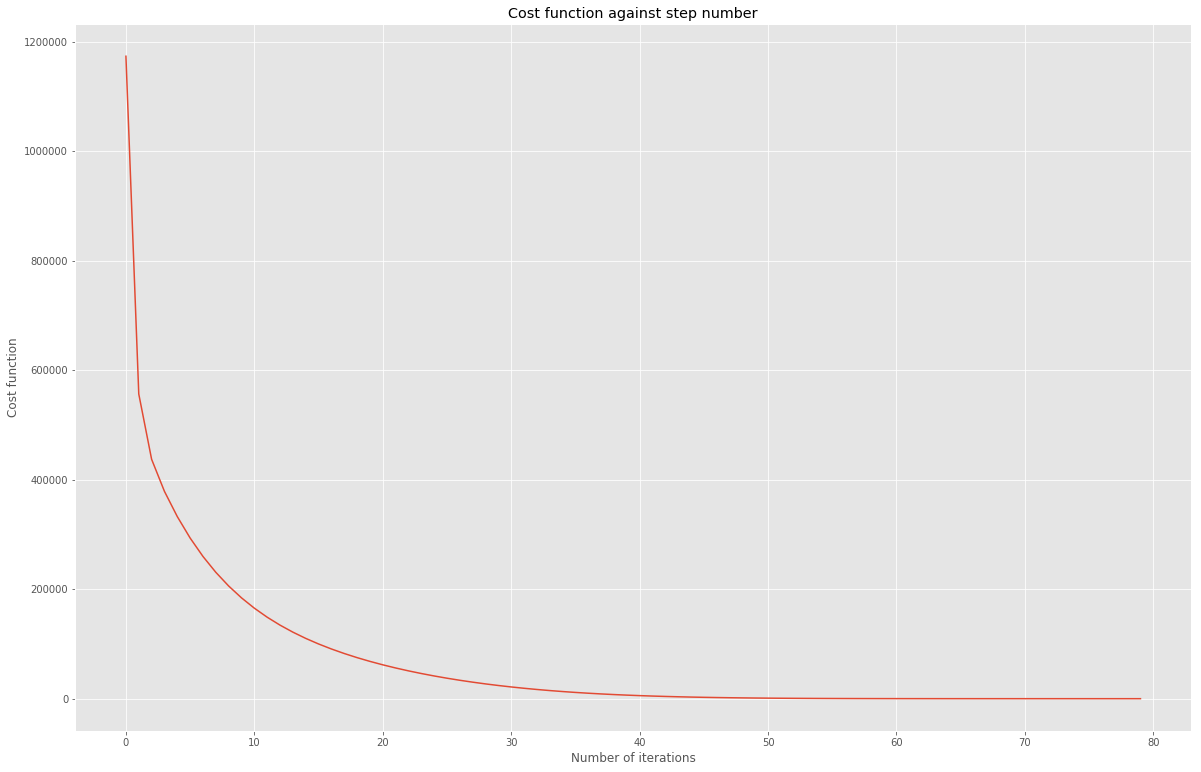

In [53]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
plt.plot(learn.index.values,learn['Cost function'].values)
plt.title('Cost function against step number')
plt.xlabel('Number of iterations')
plt.ylabel('Cost function')
plt.savefig('Error_function.png')


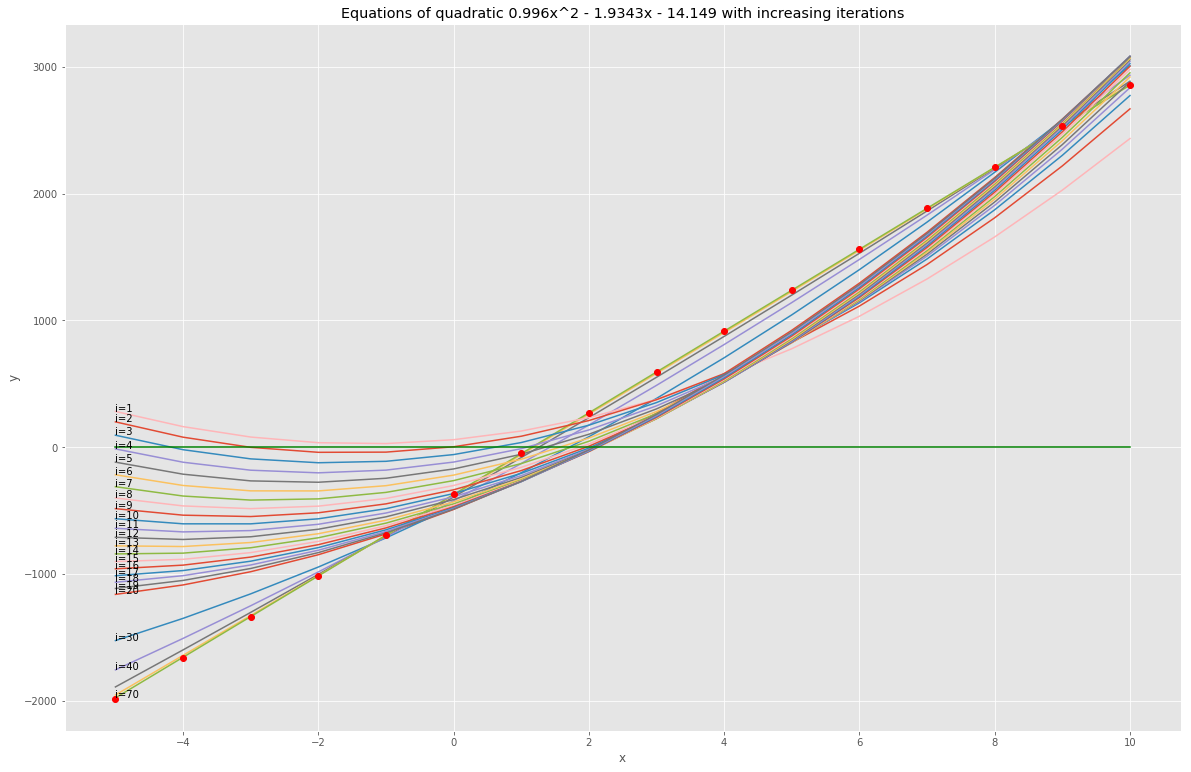

In [54]:
x = [-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10]
y = []

plt.rcParams["figure.figsize"] = (20,13)

#get 8 graphs, use a0,a1,a2 of iteration 0,10,20,30,40,50,60,70 which is actually step 1,11,21,31,41,51,61,71
for i in range(2,8):
    #Reset y
    y = []
    #16 points from -5 to 10
    for j in range(0,16):
        y.append(learn['new_a0'][i*10]+learn['new_a1'][i*10]*x[j]+learn['new_a2'][i*10]*(x[j]**2))
    plt.plot(x,y)
    if i != 5 and i !=6:
        plt.text(-5, y[0], 'i='+str(i*10))



#get 9 graphs from iteration 1-9 which is step 2-11 (iteration 0,10 or step 1,11 are covered by above)
for i in range(1,20):
    #Reset y
    y = []
    #16 points from -5 to 10
    for j in range(0,16):
        y.append(learn['new_a0'][i]+learn['new_a1'][i]*x[j]+learn['new_a2'][i]*(x[j]**2))
    plt.plot(x,y)
    plt.text(-5, y[0], 'i='+str(i))

    
plt.plot(x,[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],'g-') #baseline with green line 'g-'
plt.plot(x, [-1979,-1657,-1335,-1013,-691,-369,-47,275,597,919,1241,1563,1885,2207,2529,2851], 'ro')
plt.title('Equations of quadratic 0.996x^2 - 1.9343x - 14.149 with increasing iterations')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('Gradient_descent.png')


#Actual best fit line
#a0= -13.970346 a1=-1.911492 a2=0.987684

Text(-16, 0, 'Change in parameters a0,a1,a2 over 80 steps')

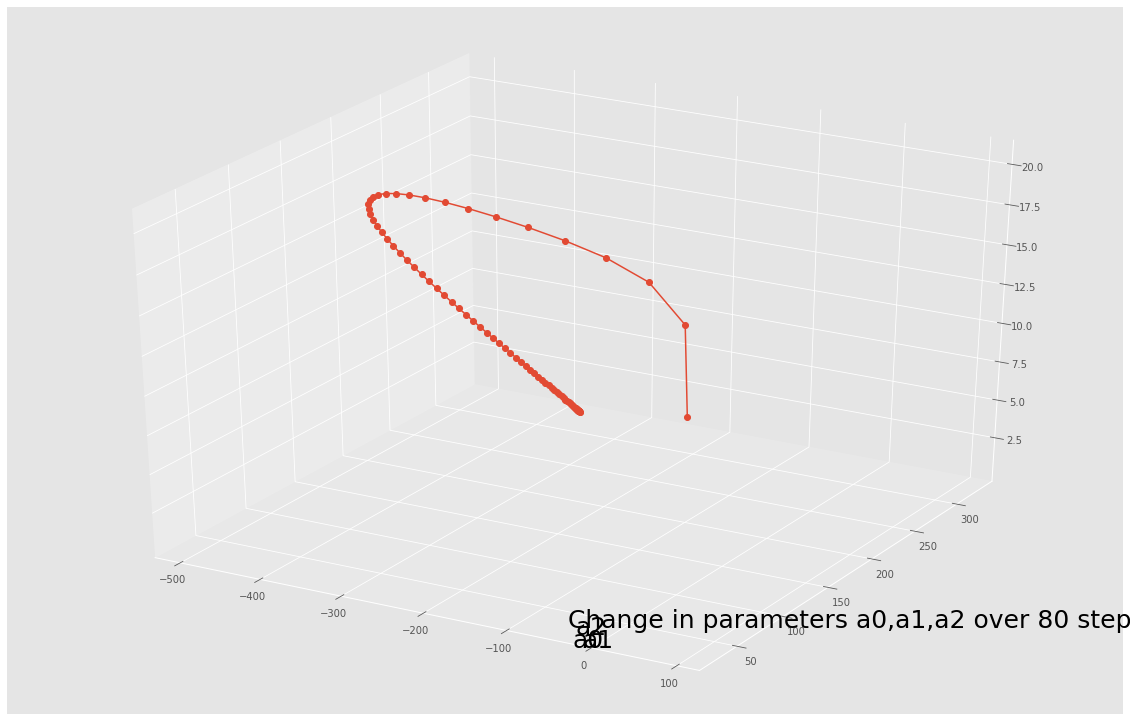

In [55]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
parachange = fig.add_subplot(111, projection='3d')
# parachange.text(x=0, y=0, z=0, text="red", color='red')
parachange.plot(xs=learn['new_a0'].values,ys=learn['new_a1'].values,zs=learn['new_a2'].values,marker='o')
parachange.text(1, 0, 0, s='a1', zdir=None, size=25)
parachange.text(-8, -2, 0, s='a0', zdir=None, size=25)
parachange.text(-8, 1.5, 0.7, s='a2', zdir=None, size=25)
parachange.text(-16, 0, 1.1, s='Change in parameters a0,a1,a2 over 80 steps', zdir=None, size=25)

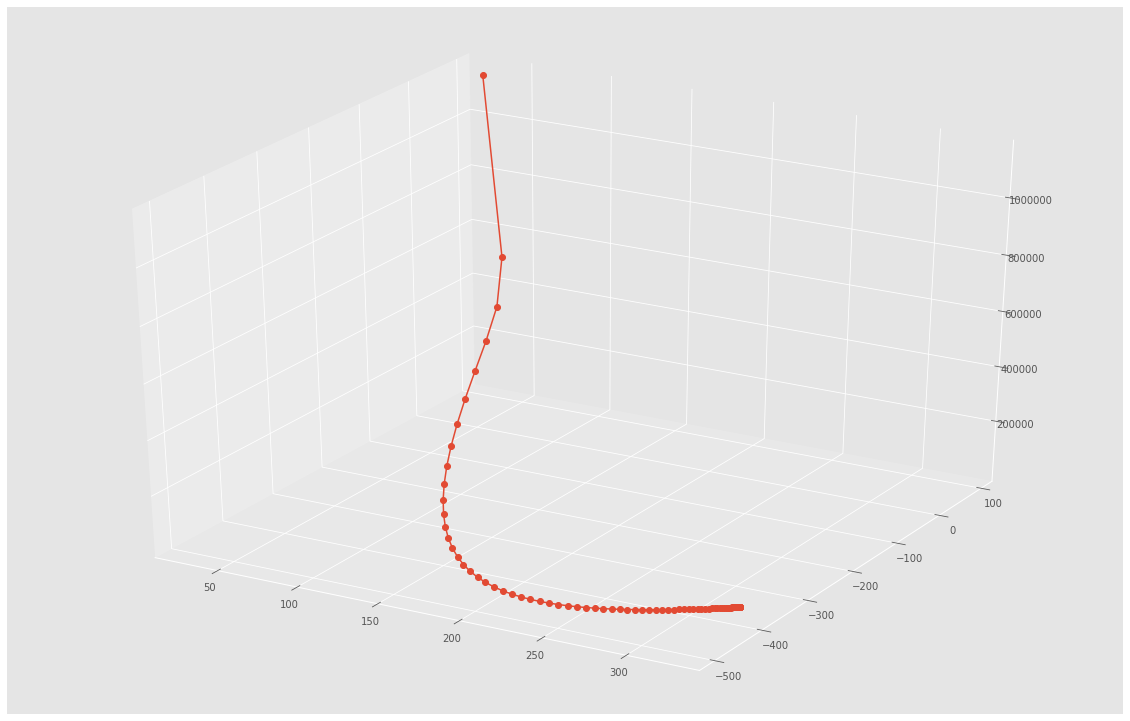

In [56]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
parachange = fig.add_subplot(111, projection='3d')
parachange.plot(xs=learn['new_a1'].values,ys=learn['new_a0'].values,zs=learn['Cost function'].values,marker='o')

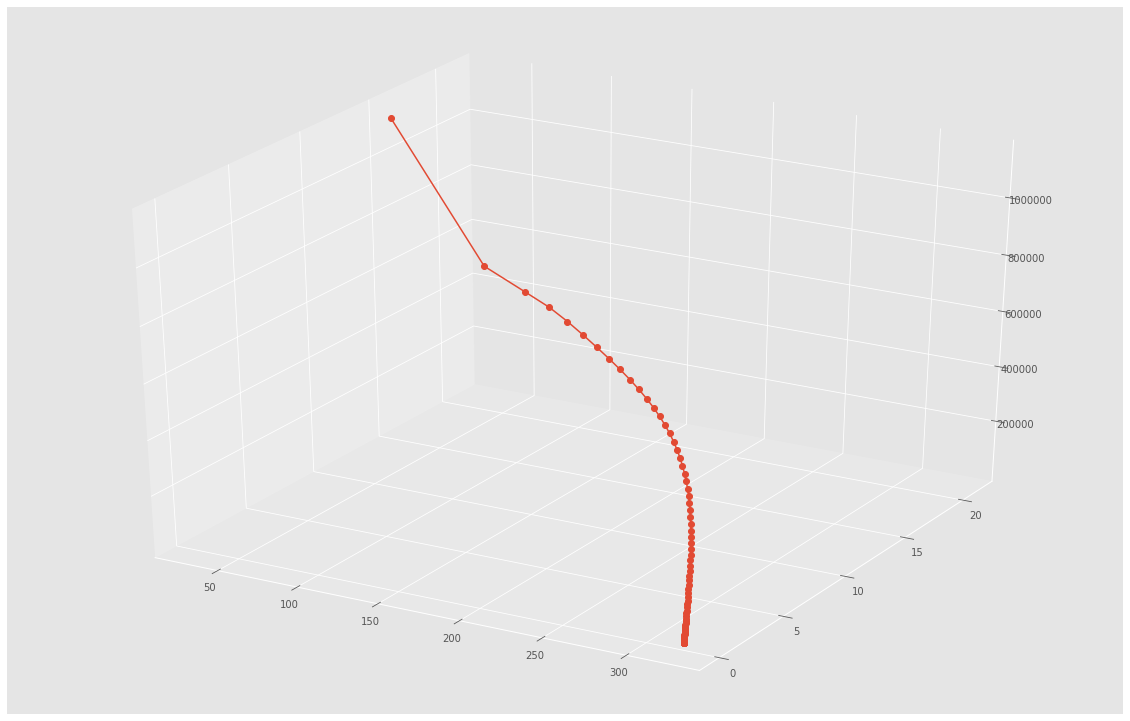

In [59]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
parachange = fig.add_subplot(111, projection='3d')
parachange.plot(xs=learn['new_a1'].values,ys=learn['new_a2'].values,zs=learn['Cost function'].values,marker='o')

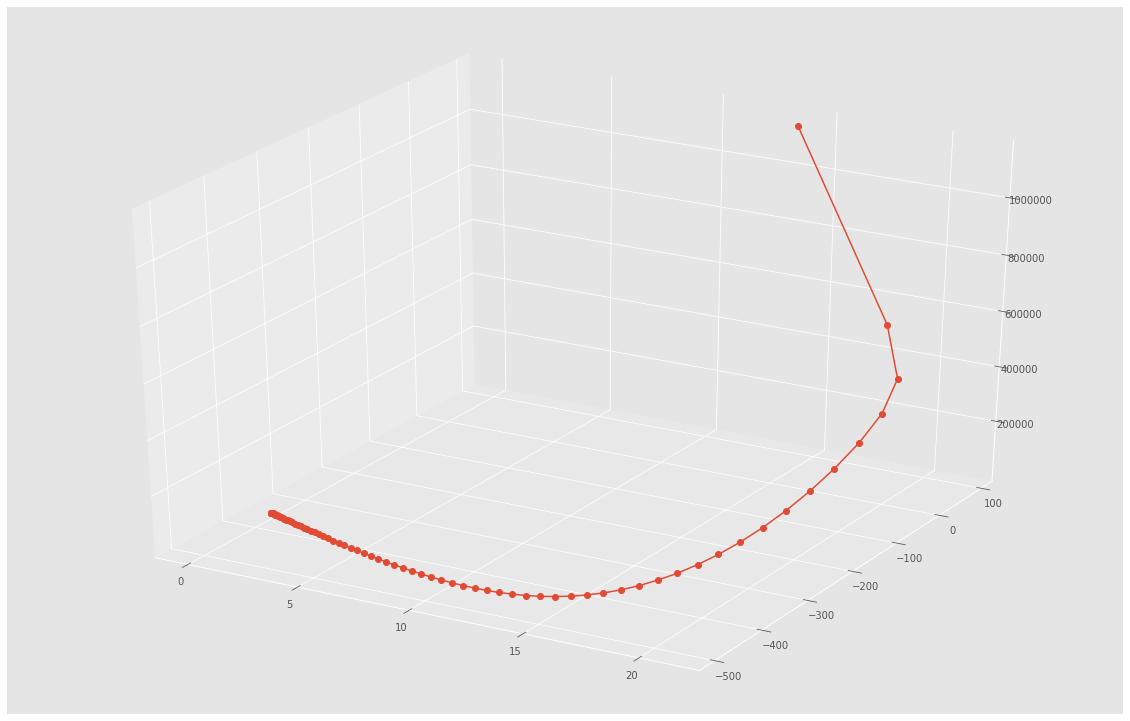

In [58]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
parachange = fig.add_subplot(111, projection='3d')
parachange.plot(xs=learn['new_a2'].values,ys=learn['new_a0'].values,zs=learn['Cost function'].values,marker='o')